In [27]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

plt.rcParams['figure.dpi'] = 150

In [28]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_1'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [29]:
wavelength = [] #Wavelength list
Intensity = [] # Intensity list


for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=1)
    wavelength.append(Data[:, 0])
    Intensity.append(Data[:, 1]) 

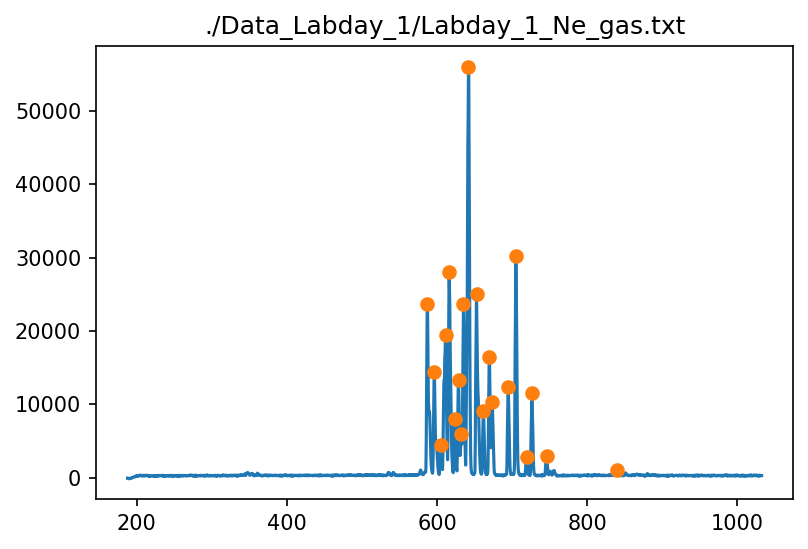

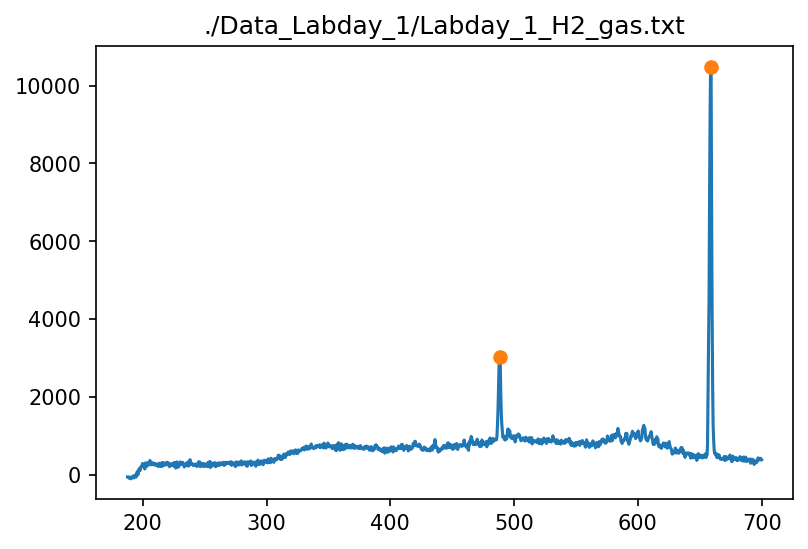

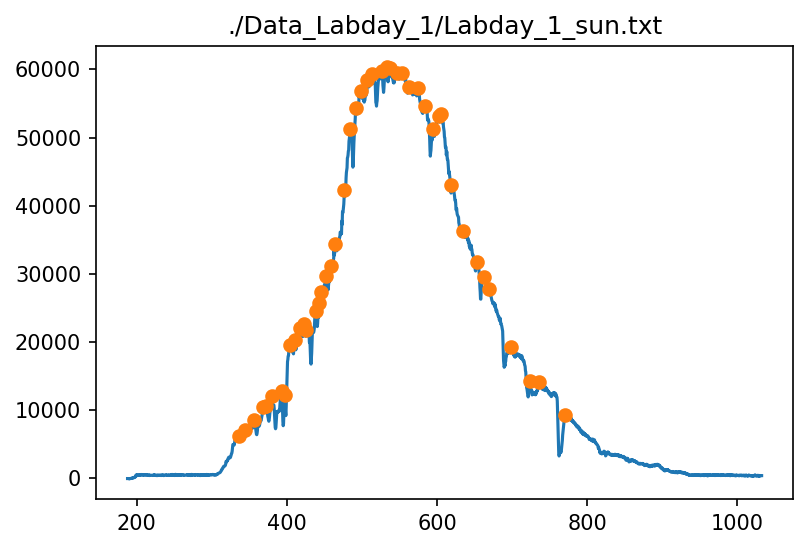

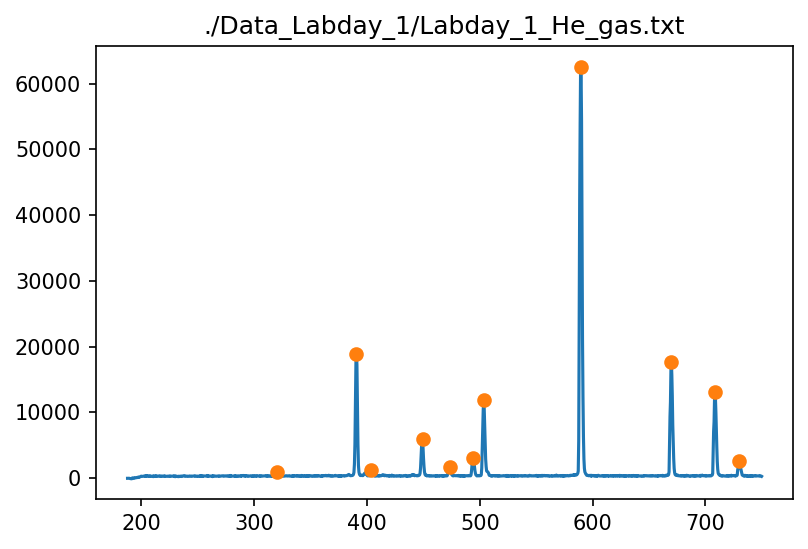

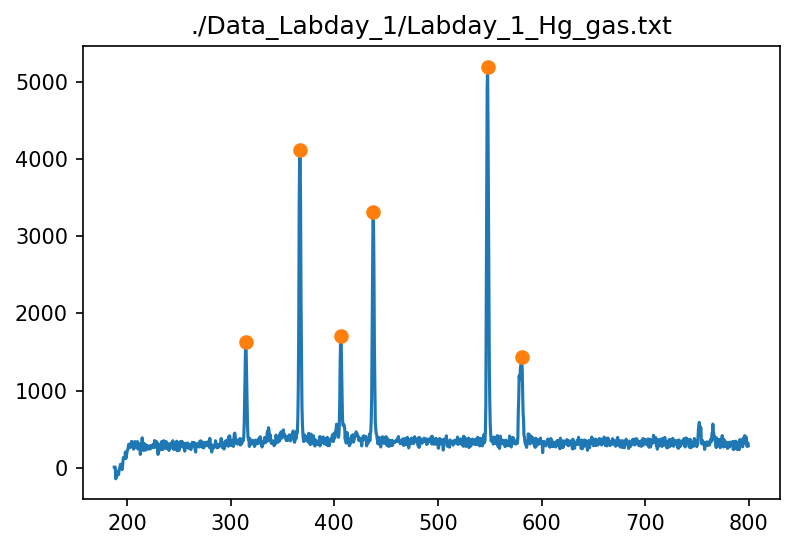

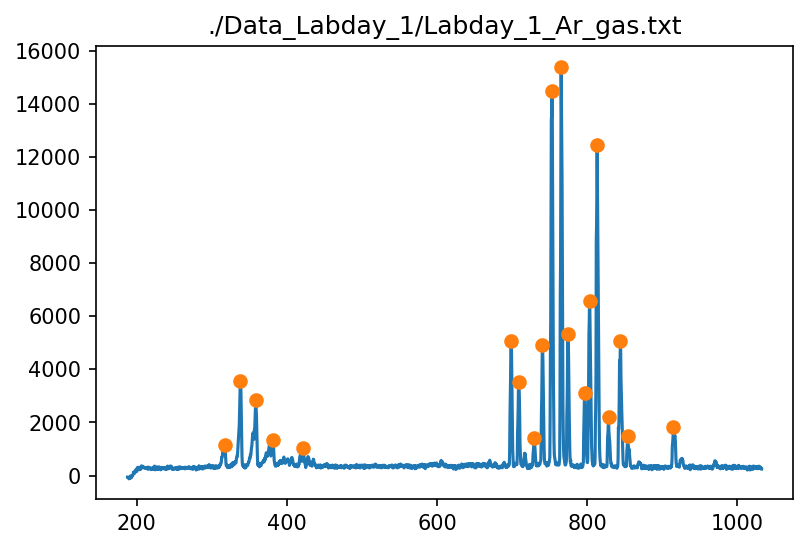

In [30]:
Wavelength_line =[] #store wavelength value for each found peak

for i, intensity in enumerate(Intensity):
    plt.figure()
    plt.plot(wavelength[i], intensity)
    peaks, _ = find_peaks(intensity, prominence = 700)
    peaks_wavelangth = [wavelength[i][peak] for peak in peaks]
    Wavelength_line.append(peaks_wavelangth)
    peaks_intensity = [intensity[peak] for peak in peaks]
    plt.plot(peaks_wavelangth, peaks_intensity, 'o')
    plt.title(f'{Data_names[i]}')

In [31]:
Wavelength_line[1] #Found for hydrogen

[488.322, 658.743]

In [33]:
#Rydberg equation

R = 1.097e7
nf = 2
ni=[]

for i in range(len(Wavelength_line[1])):
    n = np.sqrt(-1*(nf**2-Wavelength_line[1][i]*R))
    ni.append(n)
    

ni #this gives the correct wavelengths, just at a factor of 100 out? fuck that, its correct.
#These wavelengths are proportional to a change from n=3->n=2 and n=4 -> n=2

[73190.7940659206, 85008.29786556134]